In [0]:
!pip install rasterio

     |████████████████████████████████| 15.2MB 156kB/s 


In [0]:
!pip install tifffile

     |████████████████████████████████| 133kB 3.4MB/s 
     |████████████████████████████████| 706kB 45.7MB/s 


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
def scaleImgPerc(imgIn):
    w, h, d = imgIn.shape
    imgIn = np.reshape(imgIn, [w * h, d]).astype(np.float32)
    # Get 1st and 99th percentile
    mins = np.percentile(imgIn, 1, axis=0)
    maxs = np.percentile(imgIn, 99, axis=0) - mins
    imgIn = (imgIn - mins[None, :]) / maxs[None, :]
    imgIn = np.reshape(imgIn, [w, h, d])
    imgIn = (imgIn.clip(0, 1) * 255).astype(np.uint8)
    return imgIn

In [0]:
import rasterio
import numpy as np
import tifffile as tiff
from sklearn.cluster import KMeans
import matplotlib
import matplotlib.pyplot as plt

In [0]:
############################################
## Hard coded paths and vars
BDIR = '/content/drive/My Drive/PrjData/Prj_Sentinel2'
IMGDIR = BDIR + '/S2A_MSIL1C_20190715T154911_N0208_R054_T18TVK_20190715T192821.SAFE'
IMGID = 'T18TVK_20190715T154911'
BANDS = ['B05', 'B06', 'B07', 'B8A']

In [0]:
with rasterio.open(IMGDIR + '/' + IMGID + '_' + BANDS[0] + '.jp2') as f:
  print('Reading band: 1 ' + BANDS[0])
  tmpImg = f.read(1)
imgMat = np.zeros([tmpImg.shape[0], tmpImg.shape[1], len(BANDS)])
imgMat[:,:,0] = tmpImg

for i, tmpB in enumerate(BANDS[1:]):
  print('Reading band: ' + str(i+2) + ' ' + tmpB)
  with rasterio.open(IMGDIR + '/' + IMGID + '_' + tmpB + '.jp2') as f:
    imgMat[:,:,i+1] = f.read(1)
imgMat = imgMat.astype(np.float32)

Reading band: 1 B05
Reading band: 2 B06
Reading band: 3 B07
Reading band: 4 B8A


In [0]:
imgMatSc = scaleImgPerc(imgMat)
imgMatSc.shape


(5490, 5490, 4)

(<Figure size 988.8x604.8 with 2 Axes>,
 <matplotlib.image.AxesImage at 0x7fb81c7eb7f0>)

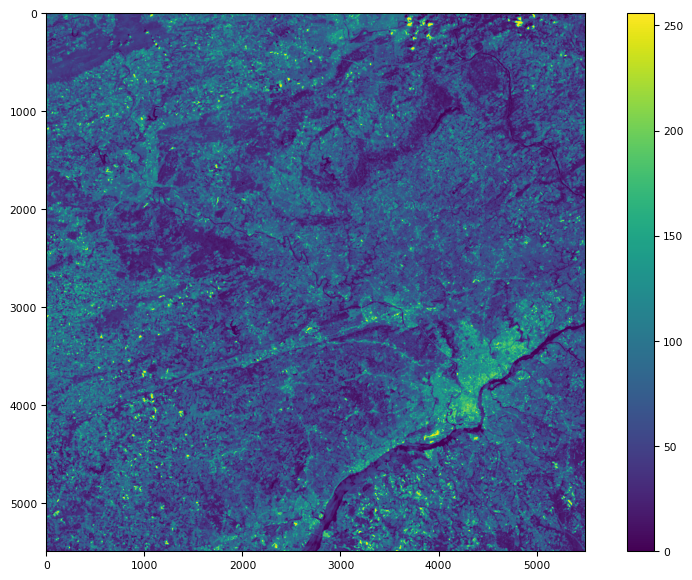

In [0]:
tiff.imshow(imgMatSc[:,:,0])

(<Figure size 988.8x604.8 with 2 Axes>,
 <matplotlib.image.AxesImage at 0x7fb81c29f3c8>)

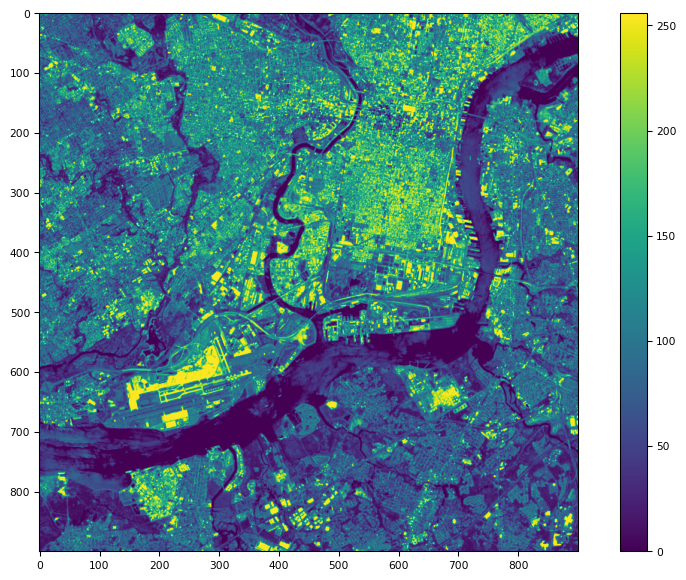

In [0]:
tiff.imshow(imgMatSc[3700:4600,3700:4600,0])

(<Figure size 988.8x604.8 with 2 Axes>,
 <matplotlib.image.AxesImage at 0x7fb81b9d4cf8>)

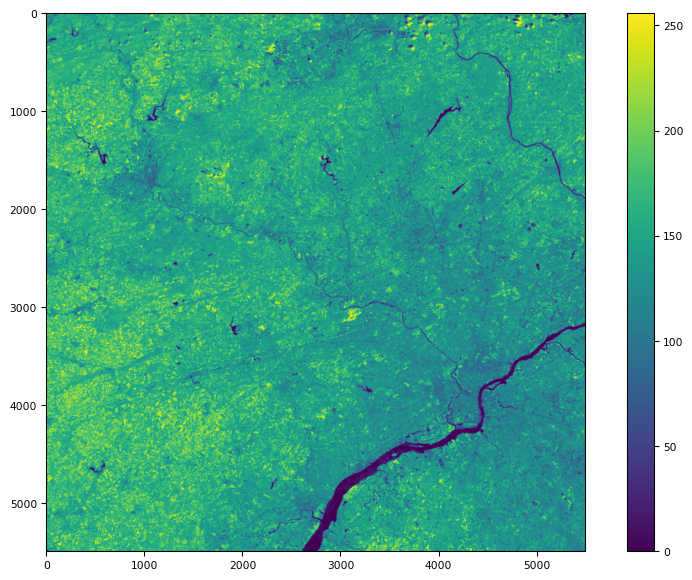

In [0]:
tiff.imshow(imgMatSc[:,:,1])

In [0]:
imgMatScDS = imgMatSc[::16,::16,:]
imgMatScDS.shape

(344, 344, 4)

(<Figure size 988.8x604.8 with 2 Axes>,
 <matplotlib.image.AxesImage at 0x7fb81b905518>)

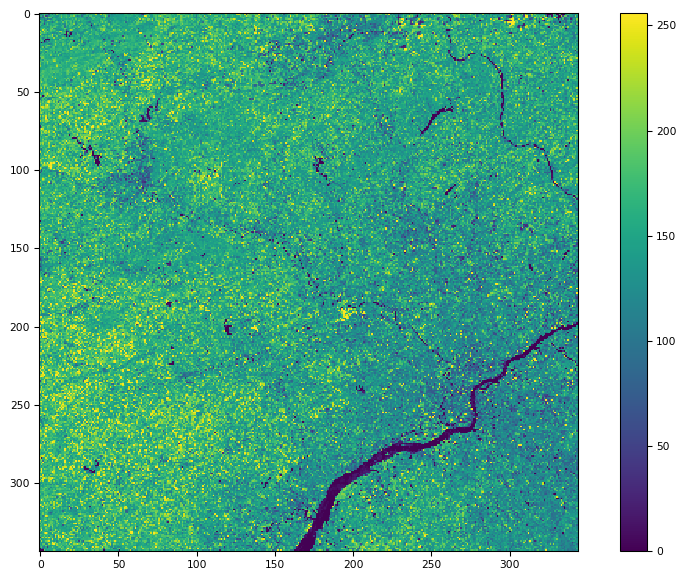

In [0]:
tiff.imshow(imgMatScDS[:,:,1])

In [0]:
imgMatScCrop = imgMatSc[3800:4500,3800:4500,:]

In [0]:
w, h, d = imgMatScDS.shape
imgVec = np.reshape(imgMatScDS, [w * h, d])
imgVec.shape

(118336, 4)

In [0]:
kVals = KMeans(n_clusters=3, random_state=0).fit(imgVec)

[Text(1, 0, '1'), Text(1, 0, '2'), Text(1, 0, '3')]

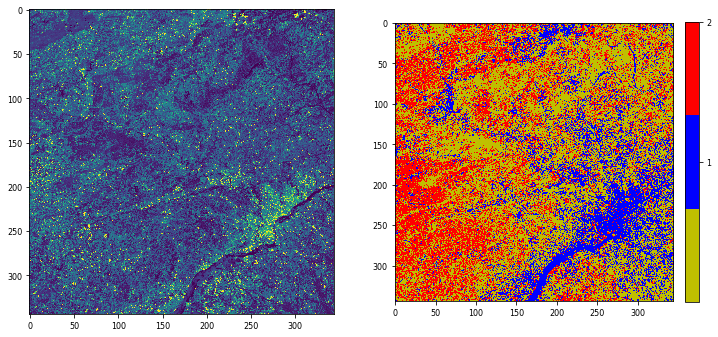

In [0]:
lImg = kVals.labels_.reshape([w, h])
fig, ax = plt.subplots(1, 2, figsize=[12,12])
#cmap = matplotlib.colors.ListedColormap(['y', 'b', 'r', 'g', 'm', 'k']) #6 classes
cmap = matplotlib.colors.ListedColormap(['y', 'b', 'r']) #3 classes
ax[0].imshow(imgMatScDS[:,:,0])
p = ax[1].imshow(lImg, cmap=cmap)
cbar = fig.colorbar(p, ax=ax[1], fraction=0.046, pad=0.04, ticks=np.arange(1,4))
cbar.ax.set_yticklabels(['1','2','3'])


In [0]:
w, h, d = imgMatScCrop.shape
imgVec = np.reshape(imgMatScCrop, [w * h, d])
imgVec.shape

(490000, 4)

In [0]:
kVals = KMeans(n_clusters=3, random_state=0).fit(imgVec)

[Text(1, 0, '1'), Text(1, 0, '2'), Text(1, 0, '3')]

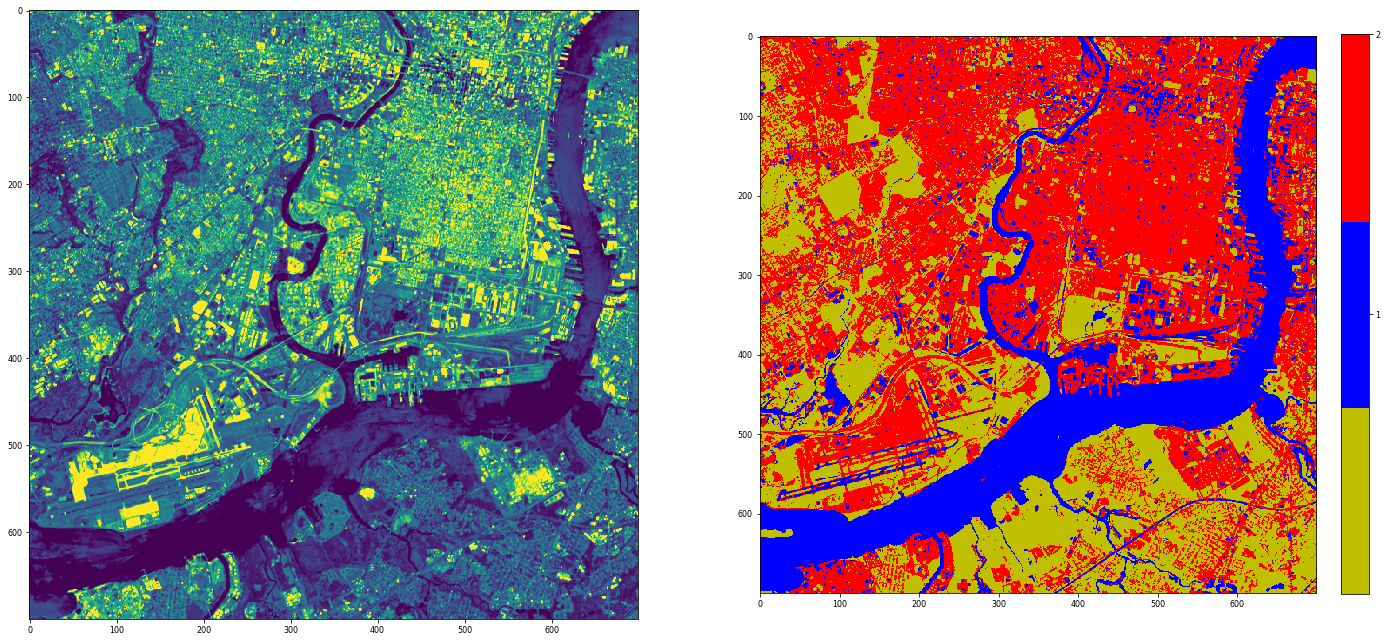

In [0]:
lImg = kVals.labels_.reshape([w, h])
fig, ax = plt.subplots(1, 2, figsize=[24,24])
#cmap = matplotlib.colors.ListedColormap(['y', 'b', 'r', 'g', 'm', 'k']) #6 classes
cmap = matplotlib.colors.ListedColormap(['y', 'b', 'r']) #3 classes
ax[0].imshow(imgMatScCrop[:,:,0])
p = ax[1].imshow(lImg, cmap=cmap)
cbar = fig.colorbar(p, ax=ax[1], fraction=0.046, pad=0.04, ticks=np.arange(1,4))
cbar.ax.set_yticklabels(['1','2','3'])

In [0]:
kVals = KMeans(n_clusters=6, random_state=0).fit(imgVec)

[Text(1, 0, '1'),
 Text(1, 0, '2'),
 Text(1, 0, '3'),
 Text(1, 0, '4'),
 Text(1, 0, '5'),
 Text(1, 0, '6')]

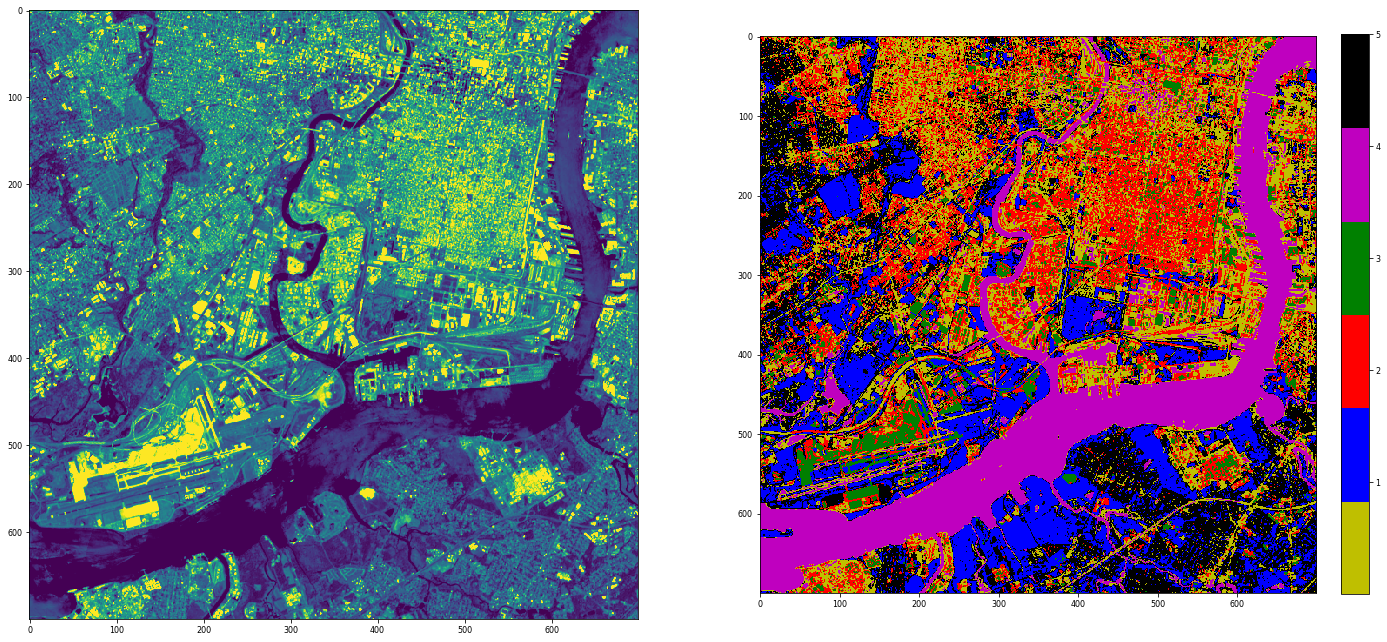

In [0]:
lImg = kVals.labels_.reshape([w, h])
fig, ax = plt.subplots(1, 2, figsize=[24,24])
cmap = matplotlib.colors.ListedColormap(['y', 'b', 'r', 'g', 'm', 'k']) #6 classes
#cmap = matplotlib.colors.ListedColormap(['y', 'b', 'r']) #3 classes
ax[0].imshow(imgMatScCrop[:,:,0])
p = ax[1].imshow(lImg, cmap=cmap)
cbar = fig.colorbar(p, ax=ax[1], fraction=0.046, pad=0.04, ticks=np.arange(1,7))
cbar.ax.set_yticklabels(['1','2','3', '4', '5', '6'])